In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.utils import to_categorical

In [24]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(path='/Users/varshitanukala/Downloads/imdb.npz', num_words=10000)
print(f'Training data shape: {train_data.shape}')
print(f'Training labels shape: {train_labels.shape}')
print(f'Testing data shape: {test_data.shape}')
print(f'Testing labels shape: {test_labels.shape}')

Training data shape: (25000,)
Training labels shape: (25000,)
Testing data shape: (25000,)
Testing labels shape: (25000,)


In [25]:
max_length = 500
train_data = pad_sequences(train_data, maxlen=max_length)
test_data = pad_sequences(test_data, maxlen=max_length)
# Convert labels to categorical (if necessary)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
# Check padded data shape
print(f'Padded training data shape: {train_data.shape}')
print(f'Padded testing data shape: {test_data.shape}')

Padded training data shape: (25000, 500)
Padded testing data shape: (25000, 500)


In [28]:
def create_model(is_bidirectional=False):
    model = Sequential()
    model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))
    if is_bidirectional:
        model.add(Bidirectional(LSTM(64)))
    else:
        model.add(LSTM(64))
    model.add(Dense(1, activation='sigmoid')) # Binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# Create LSTM model
lstm_model = create_model()
lstm_model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
lstm_history = lstm_model.fit(
    train_data, 
    train_labels, 
    epochs=5, 
    batch_size=64, 
    validation_split=0.2,
    verbose=1  # Set verbosity level (0 for silent, 1 for progress bar, 2 for one line per epoch)
)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 73s 230ms/step - accuracy: 0.6938 - loss: 0.5461 - val_accuracy: 0.8378 - val_loss: 0.3752
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 74s 236ms/step - accuracy: 0.9010 - loss: 0.2600 - val_accuracy: 0.8776 - val_loss: 0.2971
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 74s 235ms/step - accuracy: 0.9315 - loss: 0.1903 - val_accuracy: 0.8424 - val_loss: 0.3668
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 74s 237ms/step - accuracy: 0.9448 - loss: 0.1587 - val_accuracy: 0.8772 - val_loss: 0.3709
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 72s 231ms/step - accuracy: 0.9652 - loss: 0.0973 - val_accuracy: 0.8750 - val_loss: 0.4372


In [33]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(test_data, test_labels)
print(f'LSTM Test Accuracy: {lstm_accuracy:.2f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.8600 - loss: 0.4719
LSTM Test Accuracy: 0.86


In [35]:
# Create BiLSTM model
bilstm_model = create_model(is_bidirectional=True)
bilstm_model.summary()

# Train BiLSTM model
bilstm_history = bilstm_model.fit(
    train_data, 
    train_labels, 
    epochs=5, 
    batch_size=64, 
    validation_split=0.2,  # Added validation_split
    verbose=1  # Optional, to show training progress
)

# Evaluate BiLSTM model
bilstm_loss, bilstm_accuracy = bilstm_model.evaluate(test_data, test_labels)
print(f'BiLSTM Test Accuracy: {bilstm_accuracy:.2f}')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 129s 408ms/step - accuracy: 0.6824 - loss: 0.5571 - val_accuracy: 0.8292 - val_loss: 0.3963
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 135s 432ms/step - accuracy: 0.8930 - loss: 0.2755 - val_accuracy: 0.8042 - val_loss: 0.4358
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 137s 436ms/step - accuracy: 0.8948 - loss: 0.2618 - val_accuracy: 0.8826 - val_loss: 0.3147
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 450ms/step - accuracy: 0.9447 - loss: 0.1545 - val_accuracy: 0.8630 - val_loss: 0.3675
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 137s 439ms/step - accuracy: 0.9522 - loss: 0.1338 - val_accuracy: 0.8686 - val_loss: 0.3532
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.8602 - loss: 0.3774
BiLSTM Test Accuracy: 0.86


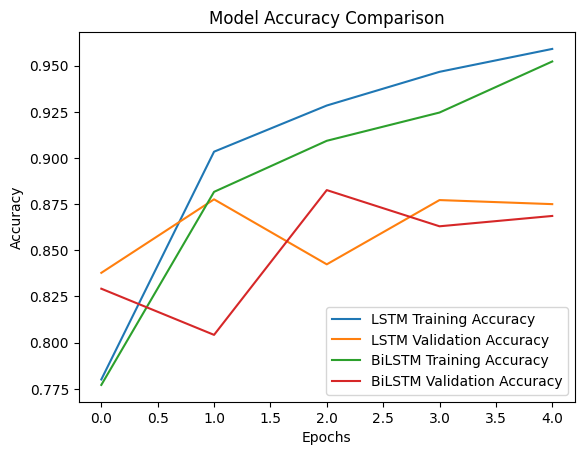

In [36]:
# Plot training & validation accuracy
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.plot(bilstm_history.history['accuracy'], label='BiLSTM Training Accuracy')
plt.plot(bilstm_history.history['val_accuracy'], label='BiLSTM Validation Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()